In [1]:
%matplotlib inline
import pandas as pd
#import pandas.util.testing as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [2]:
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_Coordinates/Dataframes/HG02011_goodDYZ2.csv")
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_Coordinates/Dataframes/T2T_goodDYZ2.csv")
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_Coordinates/Dataframes/HC02666_goodDYZ2.csv")
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_Coordinates/Dataframes/HG00358_goodDYZ2.csv")
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_Coordinates/Dataframes/HG01106_goodDYZ2.csv")
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_Coordinates/Dataframes/HG01890_goodDYZ2.csv")
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ2_Coordinates/Dataframes/HG01952_goodDYZ2.csv")

In [26]:
HG02011

,Alu,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster,SNP_Color
0,C_AluY_18150388-18150679,0,2214,['44615 372 23.9 3.5 3.9 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
1,C_AluY_18152810-18153098,0,2411,['44618 414 24.2 3.9 3.7 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
2,C_AluY_18155225-18155516,0,2411,['44621 410 24.2 3.9 3.8 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
3,C_AluY_18157634-18157921,0,2402,['44624 376 27.0 2.9 3.9 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
4,C_AluY_18160046-18160334,0,2402,['44627 354 20.9 8.6 3.0 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
...,...,...,...,...,...,...,...
3222,C_AluY_40173323-40173614,27,2396,['62249 416 24.2 2.9 4.2 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
3223,C_AluY_40175715-40176006,27,2393,['62254 428 23.8 4.1 3.2 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
3224,C_AluY_40178110-40178401,27,2393,['62257 438 23.9 2.7 4.3 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288
3225,C_AluY_40180490-40180781,27,2377,['62260 440 23.6 3.7 3.3 chrY.09-24.01.HET1_ce...,2000-2999,#4169e1,#332288


In [3]:
AllSamplesDYZ2 = list(HG02011['Lengths'])+list(T2T['Lengths'])+list(HC02666['Lengths'])+list(HG00358['Lengths'])+list(HG01106['Lengths'])+list(HG01890['Lengths'])+list(HG01952['Lengths'])

In [4]:
np.median(AllSamplesDYZ2)

2413.0

In [5]:
min(AllSamplesDYZ2)

738

In [6]:
max(AllSamplesDYZ2)

3719

In [7]:
len(AllSamplesDYZ2)

31280

(array([6.0000e+00, 1.0000e+00, 1.8400e+02, 1.5000e+01, 5.1000e+01,
        3.0866e+04, 6.1000e+01, 4.0000e+00, 4.0000e+00, 8.8000e+01]),
 array([ 738. , 1036.1, 1334.2, 1632.3, 1930.4, 2228.5, 2526.6, 2824.7,
        3122.8, 3420.9, 3719. ]),
 <BarContainer object of 10 artists>)

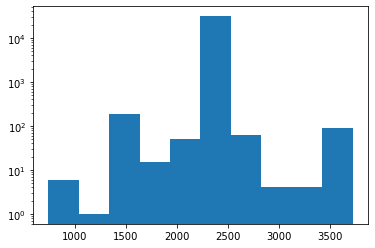

In [8]:
plt.hist(AllSamplesDYZ2, log=True, bins=10)

In [9]:
k2List = []
for x in AllSamplesDYZ2:
    if x >=2000 and x<= 2999:
        k2List.append(x)

In [24]:
k2List = []
for x in AllSamplesDYZ2:
    if x ==2413:
        k2List.append(x)

In [10]:
len(k2List)/31280

0.9891624040920716

In [12]:
#Alu sizes:
def findSubUnitSizes(df):
    simpleRepeat =[]
    Alu = []
    Satellite = []
    for row in df.index:
        for unit in ast.literal_eval(df.at[row, 'Group']):
            if 'Simple_repeat' in unit:
                simpleRepeat.append(int(unit.split(" ")[7])-int(unit.split(" ")[6]))
            elif 'SINE/Alu' in unit:
                Alu.append(int(unit.split(" ")[7])-int(unit.split(" ")[6]))
            elif 'HSATI' in unit:
                Satellite.append(int(unit.split(" ")[7])-int(unit.split(" ")[6]))
                
            else:
                continue
    return (simpleRepeat, Alu, Satellite)

In [13]:
#Alu sizes:
def findSubUnitSizes_2(df):
    simpleRepeat =[]
    Alu = []
    Satellite = []
    for row in df.index:
        for unit in ast.literal_eval(df.at[row, 'Group']):
            if 'Simple_repeat' in unit:
                simpleRepeat.append(int(unit.split(" ")[6])-int(unit.split(" ")[5]))
            elif 'SINE/Alu' in unit:
                Alu.append(int(unit.split(" ")[6])-int(unit.split(" ")[5]))
            elif 'HSATI' in unit:
                Satellite.append(int(unit.split(" ")[6])-int(unit.split(" ")[5]))
                
            else:
                continue
    return (simpleRepeat, Alu, Satellite)

In [14]:
HG02011_SR, HG02011_Alu, HG02011_sat = findSubUnitSizes(HG02011)

In [15]:
HC02666_SR, HC02666_Alu, HC02666_sat = findSubUnitSizes(HC02666)

In [16]:
HG00358_SR, HG00358_Alu, HG00358_sat = findSubUnitSizes(HG00358)

In [17]:
HG01106_SR, HG01106_Alu, HG01106_sat = findSubUnitSizes(HG01106)

In [18]:
HG01890_SR, HG01890_Alu, HG01890_sat = findSubUnitSizes(HG01890)

In [19]:
HG01952_SR, HG01952_Alu, HG01952_sat = findSubUnitSizes(HG01952)

In [20]:
T2T_SR, T2T_Alu, T2T_sat = findSubUnitSizes_2(T2T)

In [21]:
allSimpleRepeat = HG02011_SR+HC02666_SR+HG00358_SR+HG01106_SR+HG01890_SR+HG01952_SR+T2T_SR

In [22]:
allAlu = HG02011_Alu+HC02666_Alu+HG00358_Alu+HG01106_Alu+HG01890_Alu+HG01952_Alu+T2T_Alu

In [23]:
allSatellite = HG02011_sat+HC02666_sat+HG00358_sat+HG01106_sat+HG01890_sat+HG01952_sat+T2T_sat

In [39]:
print(np.mean(allAlu))

290.86636828644504


In [40]:
print(np.median(allAlu))

291.0


In [41]:
print(np.std(allAlu))

2.0659632005934974


In [44]:
2/291

0.006872852233676976

In [34]:
print(np.mean(allSimpleRepeat))

1414.8584068212347


In [43]:
383/1415

0.2706713780918728

In [38]:
print(np.median(allSimpleRepeat))

1551.0


In [37]:
print(np.std(allSimpleRepeat))

383.2166134149869


In [45]:
print(np.mean(allSatellite))

566.3004475703325


In [26]:
print(np.median(allSatellite))

567.0


In [46]:
print(np.std(allSatellite))

15.674221340578304


In [47]:
16/566

0.028268551236749116

In [27]:
291+1551+567

2409